# **Implementaci√≥n y Evaluaci√≥n de un Sistema RAID para Comparar su Rendimiento con un Disco Individual**

## **Integrantes**
- **Johana Catalina R√≠os Torres**
- **Juan Guillermo Preciado Zapata**

## **Materia**
- **Sistemas Operativos**

## **Facultad**
- **Ingenier√≠a de Sistemas, Universidad de Antioquia (UdeA)**


### **Significado de las m√©tricas en KDiskMark**:

#### SEQ1M Q8T1 (Secuencial, 1M bloque, 8 colas, 1 hilo):

- Lectura/Escritura secuencial con bloques de 1 MB usando una cola de comandos de 8 solicitudes y 1 hilo.
- Representa el rendimiento cuando se leen o escriben grandes cantidades de datos en orden (por ejemplo, archivos grandes).

#### SEQ1M Q1T1 (Secuencial, 1M bloque, 1 cola, 1 hilo):

- Lectura/Escritura secuencial con bloques de 1 MB usando una cola de comandos de 1 solicitud y 1 hilo.
- Refleja el rendimiento de operaciones de lectura/escritura secuenciales m√°s simples.

####RND4K Q32T1 (Aleatoria, 4K bloque, 32 colas, 1 hilo):

- Lectura/Escritura aleatoria con bloques de 4 KB, usando 32 colas de comandos y 1 hilo.
- Es relevante para cargas de trabajo que implican acceso aleatorio, como bases de datos o sistemas con muchos peque√±os archivos.

#### RND4K Q1T1 (Aleatoria, 4K bloque, 1 cola, 1 hilo):

- Lectura/Escritura aleatoria con bloques de 4 KB, usando 1 cola de comandos y 1 hilo.
- Refleja el rendimiento de accesos aleatorios simples, t√≠pico de aplicaciones con peque√±os accesos aleatorios.


In [4]:
!pip install researchpy

### **Tipo de ANOVA a Aplicar**

#### **1. ANOVA de dos v√≠as (Two-Way ANOVA):**

- Este tipo de ANOVA es adecuado para evaluar el efecto de dos factores (tipo de almacenamiento y tipo de medici√≥n) sobre una variable dependiente continua (rendimiento).
- Tambi√©n analiza la interacci√≥n entre los factores, es decir, si el efecto del tipo de almacenamiento depende del tipo de medici√≥n.

---

#### **Hip√≥tesis a probar**:

- **H‚ÇÄ (nula)**: No hay diferencia en el rendimiento entre RAID 0 y el disco √∫nico.
- **H‚ÇÄ (nula)**: No hay diferencia en el rendimiento entre los diferentes tipos de medici√≥n.
- **H‚ÇÄ (nula)**: No hay interacci√≥n entre el tipo de almacenamiento y el tipo de medici√≥n.

---

#### **Modelo estad√≠stico**:


$$ Y_{ijk} = \mu + A_i + B_j + (AB)_{ij} + \epsilon_{ijk}$$


Donde:
- $$A_i$$:Efecto del tipo de almacenamiento.
- $$B_j$$:Efecto del tipo de medici√≥n.
- $$(AB)_{ij}$$:Interacci√≥n entre los factores.
- $$epsilon_{ijk}$$:Error aleatorio.

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import researchpy as rp
import scipy.stats as stats

from scipy.stats import probplot
from scipy.stats import levene

import statsmodels.api as sm
from statsmodels.formula.api import ols

In [39]:
bank_data = pd.read_csv('./dataset/data_rendimiento.csv')

bank_data.head()

ID       Fecha    Prueba Storage          Medicion  Throughput_MB_s
0   1  11/16/2024  Prueba-1  RAID-0   SEQ1M Q8T1 Read           167.61
1   2  11/16/2024  Prueba-1  RAID-0   SEQ1M Q1T1 Read           159.84
2   3  11/16/2024  Prueba-1  RAID-0  RND4K Q32T1 Read             0.84
3   4  11/16/2024  Prueba-1  RAID-0   RND4K Q1T1 Read             0.56
4   5  11/16/2024  Prueba-1  RAID-0  SEQ1M Q8T1 Write           154.66

In [18]:
bank_data.shape

(896, 6)

In [40]:
import pandas as pd

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Calcular la media de rendimiento agrupando por 'Storage' y 'Medicion'
media_rendimiento = df.groupby(['Storage', 'Medicion'])['Throughput_MB_s'].mean().reset_index()

# Mostrar los resultados en una tabla en Jupyter Notebook
from IPython.display import display
display(media_rendimiento)

# Si usas solo la terminal, imprime los resultados:
print(media_rendimiento)


Storage           Medicion  Throughput_MB_s
0   DISCO-UNICO    RND4K Q1T1 Read         0.461893
1   DISCO-UNICO   RND4K Q1T1 Write         1.254607
2   DISCO-UNICO   RND4K Q32T1 Read         0.516929
3   DISCO-UNICO  RND4K Q32T1 Write         1.262286
4   DISCO-UNICO    SEQ1M Q1T1 Read       116.674857
5   DISCO-UNICO   SEQ1M Q1T1 Write        95.397786
6   DISCO-UNICO    SEQ1M Q8T1 Read       130.697964
7   DISCO-UNICO   SEQ1M Q8T1 Write        97.531393
8        RAID-0    RND4K Q1T1 Read         0.628889
9        RAID-0   RND4K Q1T1 Write         2.215556
10       RAID-0   RND4K Q32T1 Read         0.989630
11       RAID-0  RND4K Q32T1 Write         2.347407
12       RAID-0    SEQ1M Q1T1 Read       165.853704
13       RAID-0   SEQ1M Q1T1 Write       120.601111
14       RAID-0    SEQ1M Q8T1 Read       176.715926
15       RAID-0   SEQ1M Q8T1 Write       163.050000
16       RAID-1    RND4K Q1T1 Read         0.324897
17       RAID-1   RND4K Q1T1 Write         0.341931
18       RAID-1   RND4K Q32T1 Read         0.656759
19       RAID-1  RND4K Q32T1 Write         0.447517
20       RAID-1    SEQ1M Q1T1 Read        65.570069
21       RAID-1   SEQ1M Q1T1 Write        43.029897
22       RAID-1    SEQ1M Q8T1 Read        92.351828
23       RAID-1   SEQ1M Q8T1 Write        46.293034
24       RAID-5    RND4K Q1T1 Read         0.025857
25       RAID-5   RND4K Q1T1 Write         0.017536
26       RAID-5   RND4K Q32T1 Read         1.087143
27       RAID-5  RND4K Q32T1 Write         0.551429
28       RAID-5    SEQ1M Q1T1 Read        44.232929
29       RAID-5   SEQ1M Q1T1 Write        42.564643
30       RAID-5    SEQ1M Q8T1 Read        84.392143
31       RAID-5   SEQ1M Q8T1 Write        49.440214

        Storage           Medicion  Throughput_MB_s
0   DISCO-UNICO    RND4K Q1T1 Read         0.461893
1   DISCO-UNICO   RND4K Q1T1 Write         1.254607
2   DISCO-UNICO   RND4K Q32T1 Read         0.516929
3   DISCO-UNICO  RND4K Q32T1 Write         1.262286
4   DISCO-UNICO    SEQ1M Q1T1 Read       116.674857
5   DISCO-UNICO   SEQ1M Q1T1 Write        95.397786
6   DISCO-UNICO    SEQ1M Q8T1 Read       130.697964
7   DISCO-UNICO   SEQ1M Q8T1 Write        97.531393
8        RAID-0    RND4K Q1T1 Read         0.628889
9        RAID-0   RND4K Q1T1 Write         2.215556
10       RAID-0   RND4K Q32T1 Read         0.989630
11       RAID-0  RND4K Q32T1 Write         2.347407
12       RAID-0    SEQ1M Q1T1 Read       165.853704
13       RAID-0   SEQ1M Q1T1 Write       120.601111
14       RAID-0    SEQ1M Q8T1 Read       176.715926
15       RAID-0   SEQ1M Q8T1 Write       163.050000
16       RAID-1    RND4K Q1T1 Read         0.324897
17       RAID-1   RND4K Q1T1 Write         0.341931
18       RAI

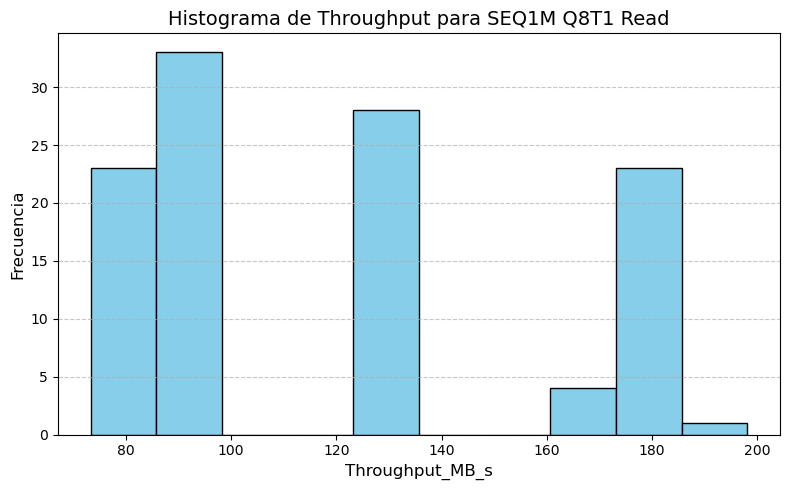

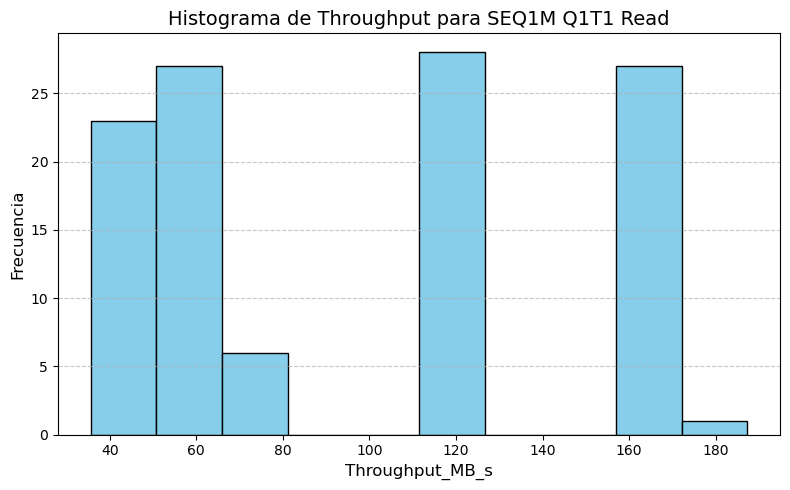

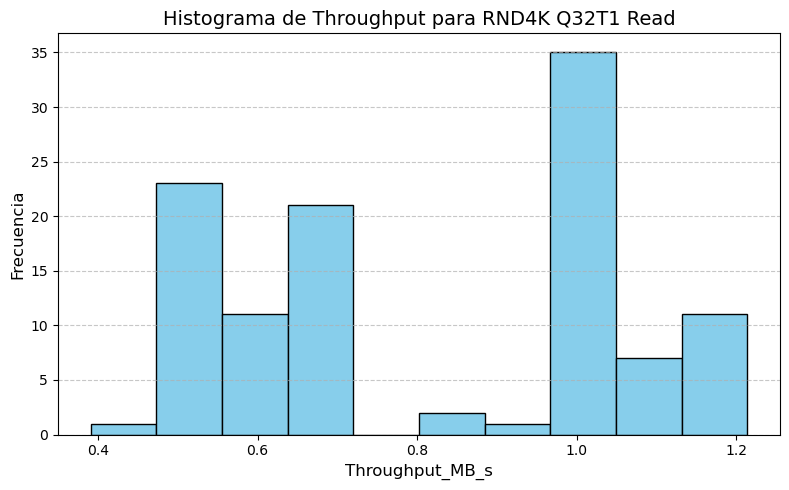

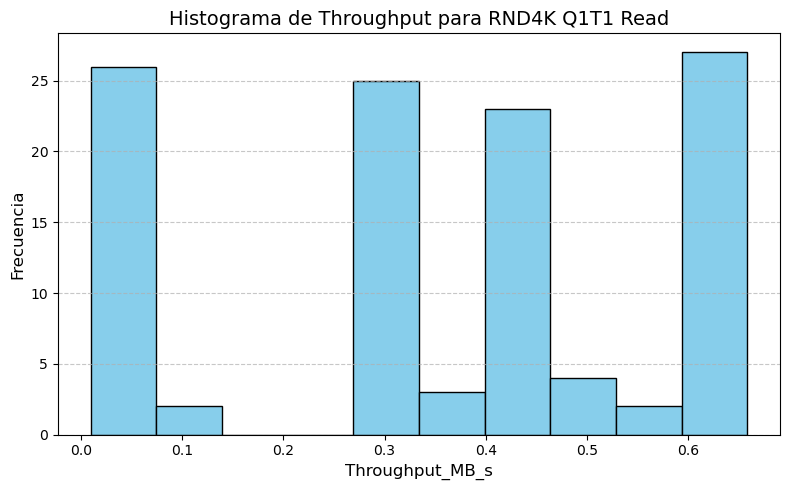

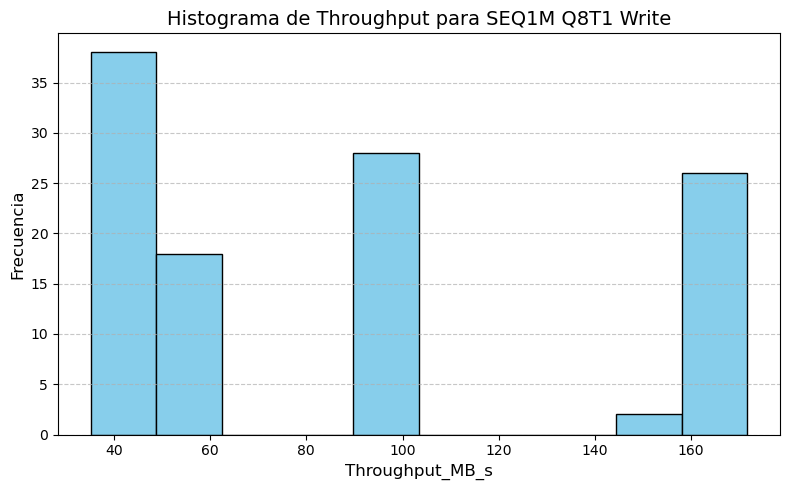

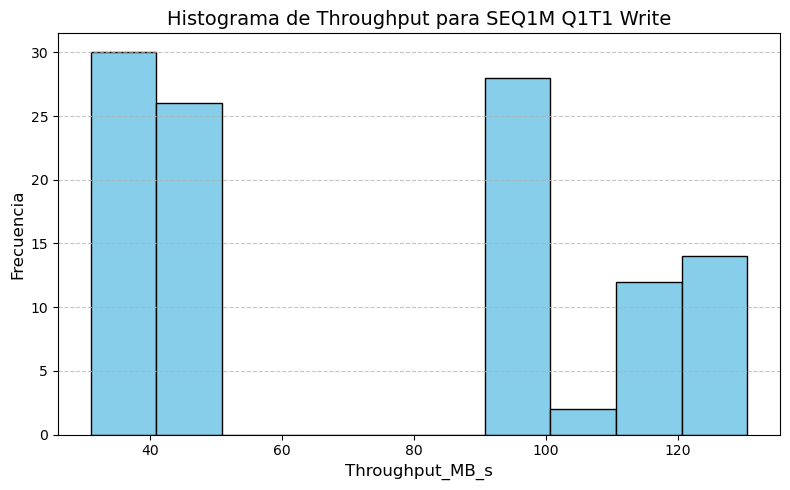

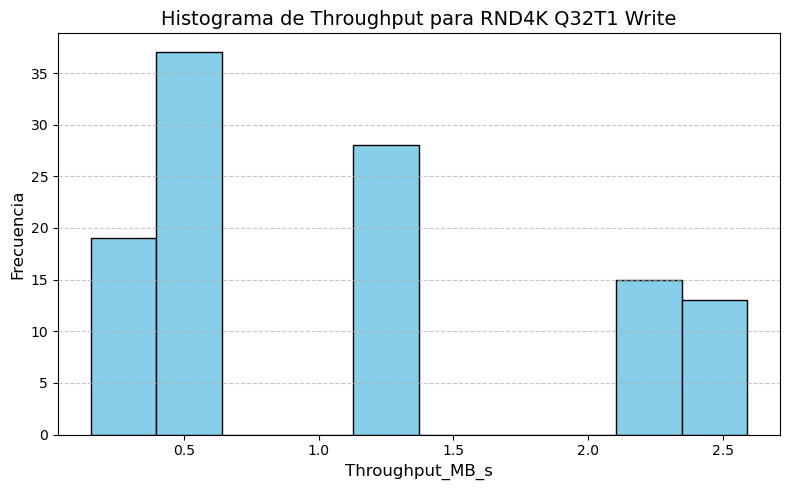

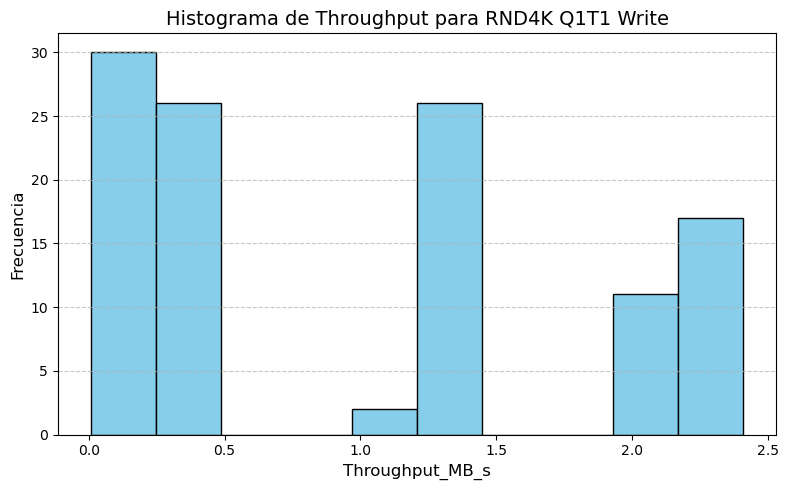

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Lista √∫nica de tipos de medici√≥n
tipos_medicion = df['Medicion'].unique()

# Generar un histograma para cada tipo de medici√≥n
for medicion in tipos_medicion:
    # Filtrar datos por el tipo de medici√≥n actual
    datos_filtrados = df[df['Medicion'] == medicion]
    
    # Crear histograma
    plt.figure(figsize=(8, 5))
    plt.hist(datos_filtrados['Throughput_MB_s'], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de Throughput para {medicion}", fontsize=14)
    plt.xlabel("Throughput_MB_s", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


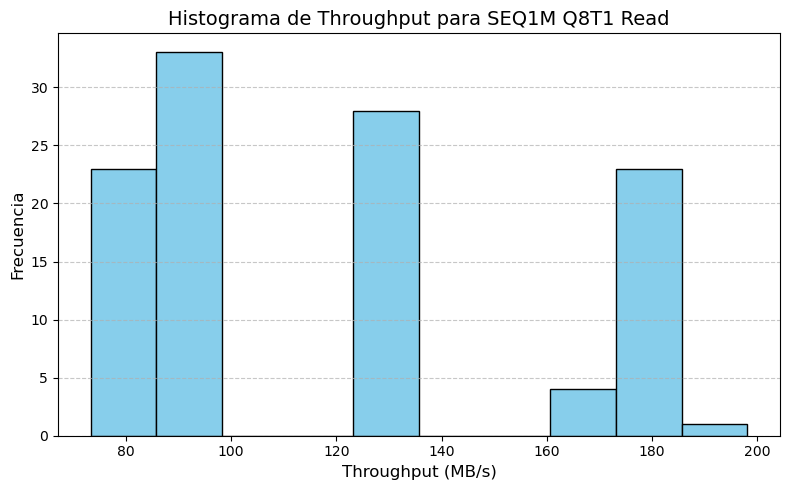

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV con el dataset (reemplaza 'tu_archivo.csv' con el nombre real de tu archivo)
df = pd.read_csv("./dataset/data_rendimiento.csv")

# Filtrar los datos para "SEQ1M Q8T1 Read"
datos_filtrados = df[df['Medicion'] == "SEQ1M Q8T1 Read"]

# Crear el histograma
plt.figure(figsize=(8, 5))
plt.hist(datos_filtrados['Throughput_MB_s'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histograma de Throughput para SEQ1M Q8T1 Read", fontsize=14)
plt.xlabel("Throughput (MB/s)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## 1. Distribuci√≥n de los Datos

- Multimodalidad:

El histograma muestra varios picos distintos en diferentes rangos de Throughput (MB/s). Esto indica que los datos no tienen una distribuci√≥n unimodal (como la normal), sino que parecen ser multimodales.

- Hay grupos de valores frecuentes alrededor de los rangos:
    - 80-100 MB/s.
    - 140-160 MB/s.
    - 180-200 MB/s.
    
- Falta de simetr√≠a:

La distribuci√≥n no es sim√©trica; parece haber varias agrupaciones en diferentes rangos de rendimiento.

## 2. Posibles Causas

Impacto de diferentes configuraciones:

Es probable que la variabilidad en el Throughput est√© asociada con el tipo de configuraci√≥n de almacenamiento (como RAID 0, RAID 1, RAID 5).
Las diferencias podr√≠an reflejar la capacidad de cada configuraci√≥n para manejar lecturas secuenciales en cargas espec√≠ficas.
Datos heterog√©neos:

Si los datos provienen de varias pruebas o entornos diferentes, esto puede introducir multimodalidad en los resultados.

## 3. Relaci√≥n con el ANOVA

La forma de esta distribuci√≥n tiene implicaciones importantes para un an√°lisis ANOVA:

Supuesto de normalidad:

Dado que la distribuci√≥n parece multimodal, es poco probable que cumpla con el supuesto de normalidad de los residuos. Esto podr√≠a afectar la validez de los resultados del ANOVA.
Pruebas adicionales necesarias:
Se deber√≠a realizar una prueba de normalidad (como Shapiro-Wilk) para confirmar si los residuos del modelo ANOVA cumplen este supuesto.
Si los datos no son normales, considera transformar los datos o usar una prueba alternativa (como Kruskal-Wallis).

## 4. Interpretaci√≥n General
La variabilidad en los datos sugiere que el rendimiento de las lecturas secuenciales (SEQ1M Q8T1 Read) depende de factores adicionales.
Las agrupaciones en los datos podr√≠an estar relacionadas con:
Diferencias entre tipos de almacenamiento (RAID 0, RAID 1, RAID 5).
Variaciones en el entorno de prueba o configuraciones del hardware.

- Recomendaciones
Separar por grupos:

Analiza los datos por tipo de almacenamiento o por otras categor√≠as relevantes para identificar patrones m√°s espec√≠ficos.
Realizar pruebas estad√≠sticas:

Realiza una prueba de normalidad en los residuos del ANOVA.
Si la normalidad no se cumple, considera usar transformaciones de datos (logaritmo, ra√≠z cuadrada) o pruebas no param√©tricas.
Visualizaci√≥n adicional:

Genera boxplots o diagramas de viol√≠n para explorar c√≥mo var√≠a el rendimiento por tipo de almacenamiento.

<Axes: xlabel='Throughput_MB_s', ylabel='Count'>

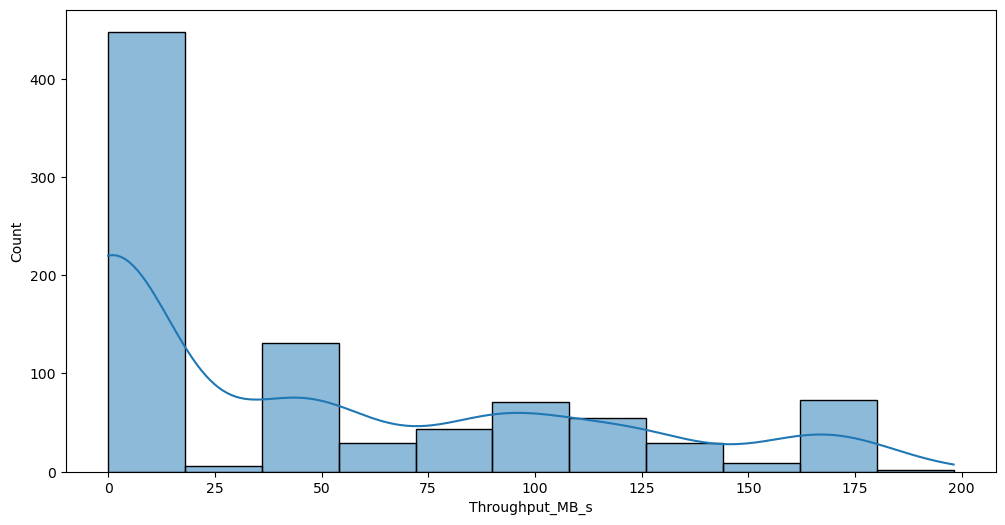

In [43]:
plt.figure(figsize = (12, 6))

sns.histplot(bank_data['Throughput_MB_s'], kde = True)

In [44]:
rp.summary_cont(bank_data['Throughput_MB_s'].groupby(bank_data['Storage']))

N     Mean       SD      SE  95% Conf.  Interval
Storage                                                        
DISCO-UNICO  224  55.4747  55.7165  3.7227    48.1385   62.8109
RAID-0       216  79.0503  79.2130  5.3898    68.4267   89.6738
RAID-1       232  31.1270  36.2131  2.3775    26.4426   35.8114
RAID-5       224  27.7890  30.1591  2.0151    23.8179   31.7600

In [45]:
rp.summary_cont(bank_data['Throughput_MB_s'].groupby(bank_data['Medicion']))

N      Mean       SD      SE  95% Conf.  Interval
Medicion                                                              
RND4K Q1T1 Read    112    0.3577   0.2241  0.0212     0.3157    0.3996
RND4K Q1T1 Write   112    0.9407   0.8702  0.0822     0.7777    1.1036
RND4K Q32T1 Read   112    0.8096   0.2414  0.0228     0.7644    0.8548
RND4K Q32T1 Write  112    1.1352   0.7844  0.0741     0.9883    1.2821
SEQ1M Q1T1 Read    112   97.1875  48.2601  4.5601    88.1513  106.2237
SEQ1M Q1T1 Write   112   74.7058  34.7943  3.2878    68.1909   81.2207
SEQ1M Q8T1 Read    112  120.2862  37.5997  3.5528   113.2460  127.3264
SEQ1M Q8T1 Write   112   88.0362  48.5976  4.5920    78.9368   97.1356

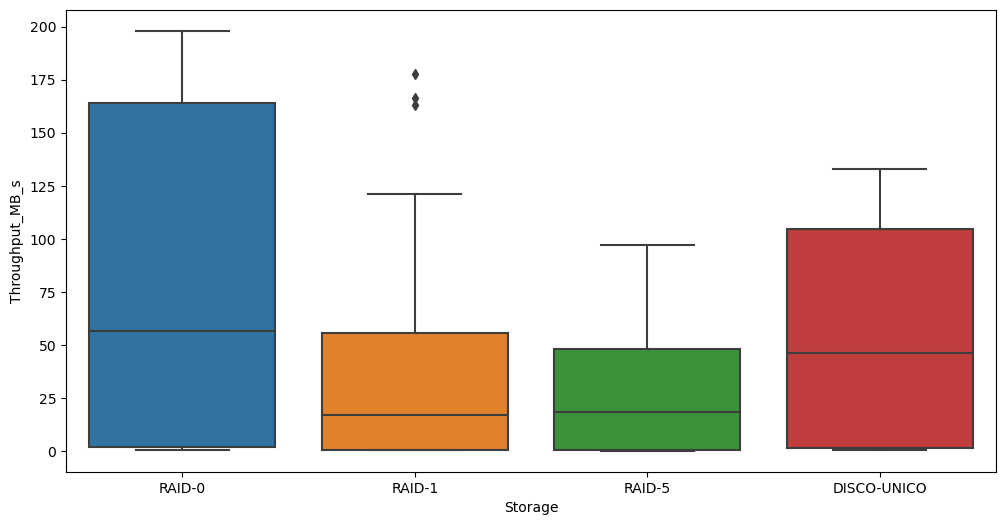

In [46]:
plt.figure(figsize = (12, 6))

sns.boxplot(y = 'Throughput_MB_s' , x = 'Storage', data = bank_data)

plt.show()

## Interpretacion: 

1. RAID 0:

Rendimiento m√°s alto: Tiene los valores de Throughput m√°s elevados, con una mediana cercana a los 125 MB/s y valores m√°ximos cerca de los 200 MB/s.
Alta variabilidad: Presenta una gran dispersi√≥n en los datos, lo que significa que su rendimiento no es consistente.

2. RAID 1:

Rendimiento bajo: La mediana est√° cerca de los 50 MB/s, indicando un rendimiento significativamente menor comparado con RAID 0.
Valores at√≠picos: Existen puntos fuera de los bigotes superiores, lo que podr√≠a indicar ciertas pruebas con rendimientos inusualmente altos.
Menor variabilidad: La mayor√≠a de los datos est√°n concentrados, lo que sugiere un comportamiento m√°s estable.

3. RAID 5:

El rendimiento m√°s bajo: La mediana est√° cerca de los 25 MB/s, lo que indica un rendimiento pobre en comparaci√≥n con todas las dem√°s configuraciones.
Baja variabilidad: Los datos est√°n estrechamente agrupados, mostrando un rendimiento consistentemente bajo.

4. Disco √önico:

Rendimiento intermedio: Tiene una mediana cercana a los 100 MB/s, superando a RAID 1 y RAID 5, pero inferior a RAID 0.
Alta variabilidad: Similar a RAID 0, la dispersi√≥n de los datos es notable, indicando fluctuaciones significativas en el rendimiento.

### Comparaci√≥n Global
RAID 0 tiene el mejor rendimiento, pero su alta variabilidad podr√≠a no ser ideal para aplicaciones que requieren consistencia.
RAID 1 tiene un rendimiento bajo pero es m√°s estable; podr√≠a ser √∫til en sistemas donde la redundancia es m√°s importante que el rendimiento.
RAID 5 presenta el peor rendimiento, aunque es consistente; esto podr√≠a deberse a la sobrecarga asociada con el c√°lculo de paridad.
Disco √önico ofrece un rendimiento competitivo, aunque menos predecible que RAID 1.

### Conclusi√≥n
Si el rendimiento m√°ximo es prioritario, RAID 0 es la mejor opci√≥n.
Si la estabilidad es m√°s importante, RAID 1 podr√≠a ser preferido a costa de menor rendimiento.
RAID 5 no parece competitivo en t√©rminos de rendimiento, pero podr√≠a ser √∫til en escenarios donde la tolerancia a fallos sea cr√≠tica.
El Disco √önico ofrece un balance razonable entre rendimiento y simplicidad.


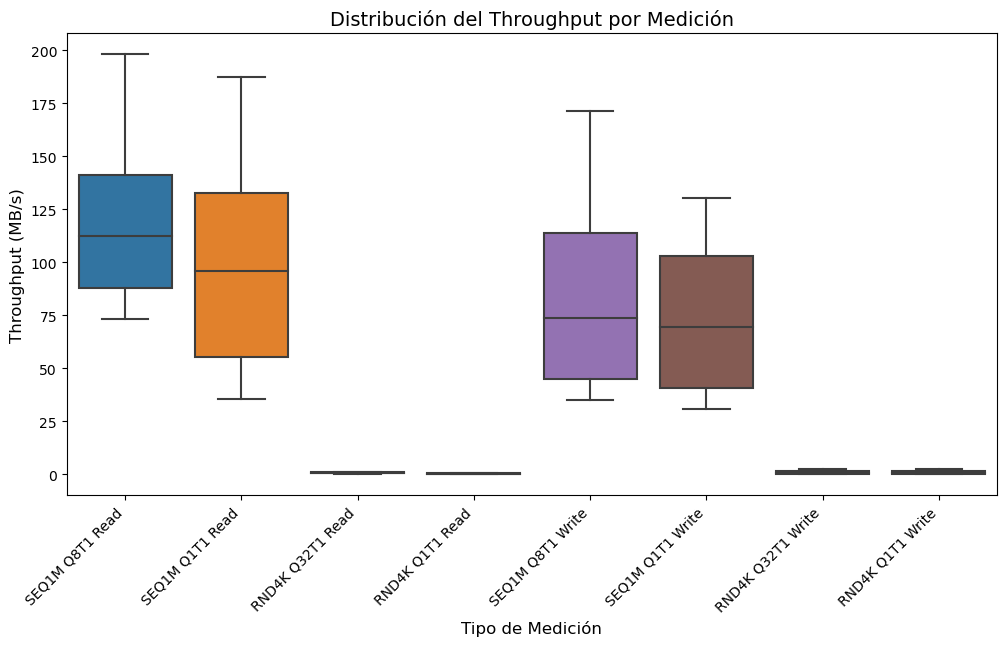

In [47]:
plt.figure(figsize = (12, 6))

sns.boxplot(y = 'Throughput_MB_s' , x = 'Medicion', data = bank_data)

plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotaci√≥n diagonal
plt.title("Distribuci√≥n del Throughput por Medici√≥n", fontsize=14)
plt.xlabel("Tipo de Medici√≥n", fontsize=12)
plt.ylabel("Throughput (MB/s)", fontsize=12)

plt.show()

## Interpretacion: 

### Observaciones Generales por Tipo de Medici√≥n

1. **SEQ1M Q8T1 Read y SEQ1M Q1T1 Read: **

Estas mediciones presentan los valores de Throughput m√°s altos, con medianas cercanas a 125 MB/s para Q8T1 y alrededor de 100 MB/s para Q1T1.
La variabilidad es moderada, con valores m√≠nimos y m√°ximos relativamente amplios.
Esto indica que las lecturas secuenciales son significativamente m√°s r√°pidas y consistentes en comparaci√≥n con las otras mediciones.

2. **RND4K Q32T1 Read y RND4K Q1T1 Read:**
Estas mediciones tienen valores de Throughput muy bajos, con medianas cercanas a 0 MB/s.
La caja es extremadamente peque√±a, lo que sugiere muy poca variabilidad. Esto podr√≠a reflejar limitaciones del sistema para manejar operaciones aleatorias de lectura.

3. **SEQ1M Q8T1 Write y SEQ1M Q1T1 Write:**
Las operaciones de escritura secuencial muestran un rendimiento razonable, con medianas entre 50-100 MB/s dependiendo de la configuraci√≥n (Q8T1 es m√°s r√°pida que Q1T1).
Existe algo de dispersi√≥n en los valores, pero no tan significativa como en las lecturas.

4. **RND4K Q32T1 Write y RND4K Q1T1 Write:**
Similar a las operaciones de lectura aleatoria, el rendimiento es extremadamente bajo, con medianas cercanas a 0 MB/s.
La falta de variabilidad tambi√©n sugiere que el sistema tiene problemas consistentes con operaciones aleatorias.

### 2. Comparaci√≥n entre RAID y Disco √önico (impl√≠cito)
Aunque no est√° expl√≠cito en la gr√°fica si cada medici√≥n corresponde a RAID o Disco √önico, se pueden inferir las siguientes generalidades:

Lecturas secuenciales (SEQ1M Q8T1 y Q1T1) probablemente beneficien m√°s a configuraciones RAID (especialmente RAID 0), lo que explica los valores altos.
Operaciones aleatorias (RND4K) parecen tener un rendimiento consistentemente bajo para todas las configuraciones, lo cual podr√≠a ser un cuello de botella inherente al hardware o software.

### 3. Conclusi√≥n
Lecturas secuenciales son el punto fuerte tanto de RAID como del disco √∫nico, siendo RAID 0 probablemente el m√°s beneficiado.
Operaciones aleatorias presentan un bajo rendimiento, lo cual podr√≠a ser un √°rea a mejorar si estas operaciones son cr√≠ticas para el sistema.
Las diferencias en escritura secuencial son menos pronunciadas, pero a√∫n muestran cierta variabilidad entre configuraciones.

In [48]:
model_one_way = ols('Throughput_MB_s ~  C(Storage)', data = bank_data).fit()

sm.stats.anova_lm(model_one_way)

df        sum_sq        mean_sq          F        PR(>F)
C(Storage)    3.0  3.783116e+05  126103.878930  44.162004  1.298937e-26
Residual    892.0  2.547091e+06    2855.483597        NaN           NaN

## Intepretaci√≥n:

### El tipo de almacenamiento (Storage) tiene un efecto significativo en el Throughput_MB_s:

El valor ùëÉ < 0.05 indica que las diferencias entre los grupos (RAID 0, RAID 1, RAID 5, Disco √önico) no son debidas al azar.
Esto significa que el tipo de almacenamiento influye significativamente en el rendimiento del throughput.

- Aunque el ANOVA confirma que hay diferencias significativas, es importante analizar m√°s a fondo:
    - ¬øQu√© tipos de almacenamiento difieren entre s√≠? Esto puede explorarse con un an√°lisis post hoc como Tukey HSD.
    
    - ¬øQu√© tan grandes son las diferencias en t√©rminos pr√°cticos?

In [49]:
model_one_way.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     44.16
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.30e-26
Time:                        00:22:36   Log-Likelihood:                -4834.1
No. Observations:                 896   AIC:                             9676.
Df Residuals:                     892   BIC:                             9695.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.4747      3.570     15.537      0.000      48.467      62.482
C(Storage)[T.RAID-0]    23.5756      5.096      4.626      0.000      13.574      33.577
C(Storage)[T.RAID-1]   -24.3477      5.006     -4.864      0.000     -34.172     -14.524
C(Storage)[T.RAID-5]   -27.6857      5.049     -5.483      0.000     -37.596     -17.776
==============================================================================
Omnibus:                      308.350   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.423
Skew:                           0.224   Prob(JB):                     6.82e-12
Kurtosis:                       1.915   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. **Efecto del tipo de almacenamiento:**

- RAID 0 mejora significativamente el rendimiento en comparaci√≥n con el Disco √önico (+23.58 MB/s).

- RAID 1 y RAID 5 reducen significativamente el rendimiento en comparaci√≥n con el Disco √önico (‚àí24.35 y ‚àí27.69 MB/s, respectivamente).

2. **Limitaciones del modelo:**

El bajo valor de ùëÖ2  (12.9%) indica que hay factores adicionales no incluidos en este modelo que influyen en el rendimiento.

In [63]:
## Anova bidireccional sin interacci√≥n con dos variables explicativas categ√≥ricas
model_two_way_without_interaction = ols('Throughput_MB_s ~ C(Storage) + C(Medicion)' , 
                                        data = bank_data).fit()

sm.stats.anova_lm(model_two_way_without_interaction)

df        sum_sq        mean_sq           F         PR(>F)
C(Storage)     3.0  3.783116e+05  126103.878930  257.246092  5.164069e-120
C(Medicion)    7.0  2.113258e+06  301894.003073  615.849830   0.000000e+00
Residual     885.0  4.338333e+05     490.207172         NaN            NaN

In [64]:
model_two_way_without_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     508.3
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        01:05:08   Log-Likelihood:                -4041.1
No. Observations:                 896   AIC:                             8104.
Df Residuals:                     885   BIC:                             8157.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            7.9000      2.453      3.220      0.001       3.085      12.715
C(Storage)[T.RAID-0]                23.5756      2.111     11.166      0.000      19.432      27.719
C(Storage)[T.RAID-1]               -24.3477      2.074    -11.740      0.000     -28.418     -20.277
C(Storage)[T.RAID-5]               -27.6857      2.092    -13.234      0.000     -31.792     -23.580
C(Medicion)[T.RND4K Q1T1 Write]      0.5830      2.959      0.197      0.844      -5.224       6.390
C(Medicion)[T.RND4K Q32T1 Read]      0.4520      2.959      0.153      0.879      -5.355       6.259
C(Medicion)[T.RND4K Q32T1 Write]     0.7775      2.959      0.263      0.793      -5.029       6.584
C(Medicion)[T.SEQ1M Q1T1 Read]      96.8298      2.959     32.728      0.000      91.023     102.637
C(Medicion)[T.SEQ1M Q1T1 Write]     74.3481      2.959     25.129      0.000      68.541      80.155
C(Medicion)[T.SEQ1M Q8T1 Read]     119.9285      2.959     40.535      0.000     114.122     125.735
C(Medicion)[T.SEQ1M Q8T1 Write]     87.6785      2.959     29.634      0.000      81.872      93.485
==============================================================================
Omnibus:                       16.418   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.139
Skew:                           0.242   Prob(JB):                     0.000851
Kurtosis:                       2.619   Cond. No.                         9.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpretaci√≥n:

1. Almacenamiento:

- RAID 0 mejora significativamente el throughput en comparaci√≥n con el Disco √önico.
- RAID 1 y RAID 5 tienen un rendimiento significativamente peor que el Disco √önico.

2. Medici√≥n:

- Las operaciones secuenciales (SEQ1M) son las m√°s significativas para mejorar el throughput, especialmente SEQ1M Q8T1 Read.
- Las operaciones aleatorias (RND4K) no tienen un impacto significativo en el throughput.

3. Importancia Pr√°ctica:

- Los sistemas que dependen de operaciones secuenciales podr√≠an beneficiarse enormemente de RAID 0 y configuraciones optimizadas para SEQ1M.
- Las configuraciones RAID 1 y RAID 5 no son ideales para maximizar el throughput.

4. Rendimiento Global del Modelo:

- El modelo explica un 85.2% de la variabilidad en los datos, lo que sugiere que los factores de almacenamiento y medici√≥n son determinantes en el rendimiento.

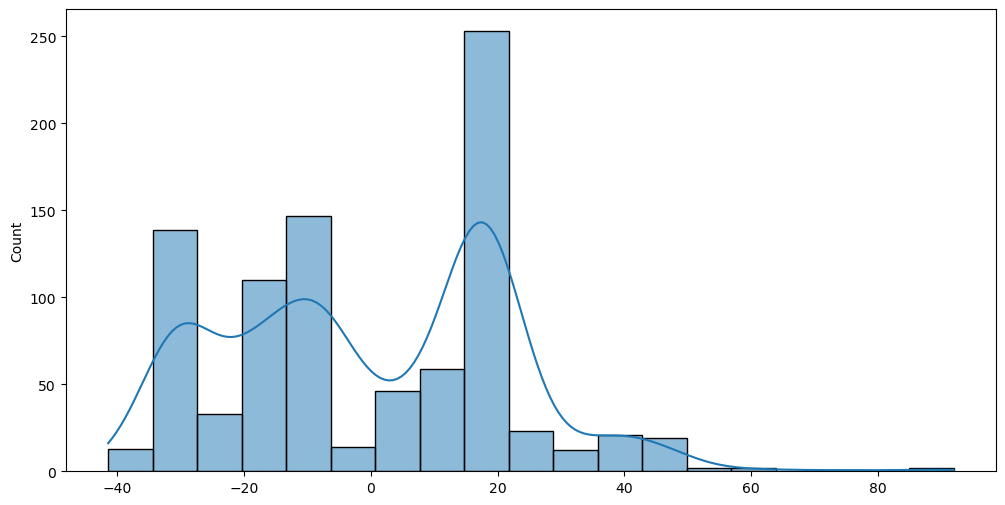

In [65]:
## Comprobar hipotesis de Normalidad en torno a los residuos
plt.figure(figsize = (12, 6))

sns.histplot(model_two_way_without_interaction.resid, kde = True)
plt.show()

1. Forma de la Distribuci√≥n
- Asimetr√≠a:

La distribuci√≥n de los residuos no parece ser completamente sim√©trica.
Hay una acumulaci√≥n de residuos en valores cercanos a 20, lo que sugiere una leve asimetr√≠a hacia la derecha (cola m√°s larga hacia valores positivos).

- Bimodalidad:

La curva KDE sugiere la presencia de dos picos principales, lo cual no es caracter√≠stico de una distribuci√≥n normal (que deber√≠a tener un √∫nico pico en el centro).
Esto puede indicar la influencia de m√∫ltiples patrones o grupos no capturados completamente por el modelo.

- Extremos:

Existen valores at√≠picos o extremos en el rango de ‚àí40 a 80, lo que tambi√©n contribuye a la desviaci√≥n de la normalidad.

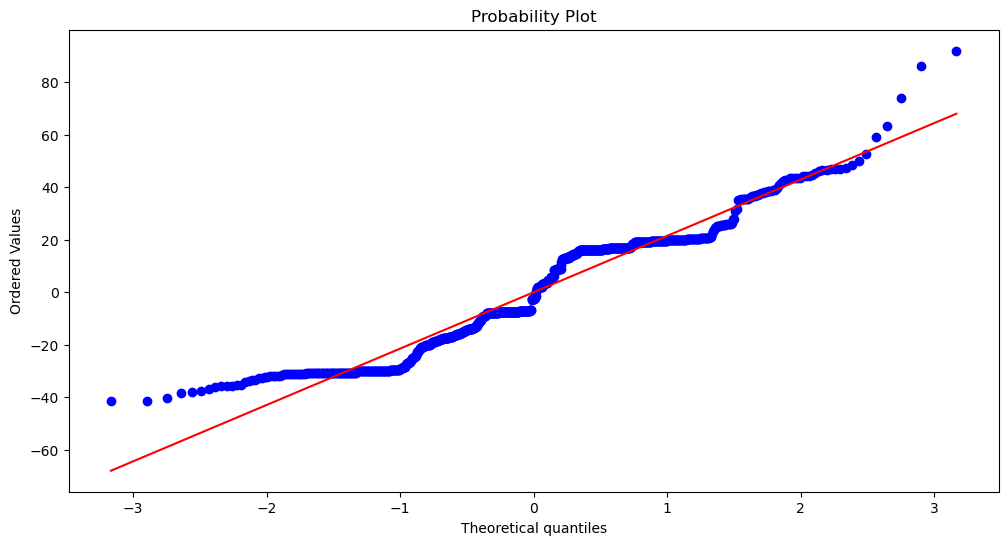

In [54]:
plt.figure(figsize = (12, 6))

probplot(model_two_way_without_interaction.resid, dist = 'norm', plot = plt);

**La gr√°fica muestra que:**

- Los residuos tienen una distribuci√≥n aproximadamente normal en el centro.
- Los extremos presentan desviaciones significativas, sugiriendo colas pesadas o valores at√≠picos.
- Es importante realizar pruebas adicionales o ajustar el modelo para mejorar la robustez de las conclusiones estad√≠sticas.

In [55]:
stats.shapiro(model_two_way_without_interaction.resid)

ShapiroResult(statistic=0.9449739456176758, pvalue=9.689659042714558e-18)

## Prueba de Shapiro-Wilk

La prueba de Shapiro-Wilk se utiliza para evaluar si una muestra de datos sigue una distribuci√≥n normal. Es una prueba estad√≠stica com√∫n para verificar el supuesto de normalidad en an√°lisis estad√≠sticos, como la regresi√≥n lineal y ANOVA.

1. statistic = 0.9449:

- Es el estad√≠stico ùëä de Shapiro-Wilk.
- Valores cercanos a 1 indican una mayor concordancia con la normalidad.
- En este caso, ùëä=0.9449 sugiere que los datos no son perfectamente normales.

2. pvalue = 9.69 \times 10^{-18}:

- Un valor extremadamente bajo (ùëù < 0.05) indica que los datos no siguen una distribuci√≥n normal.
- En este caso, ùëù‚âà0, lo que rechaza la hip√≥tesis nula de normalidad.


## ¬øQu√© significa esto para el modelo?
1. Resultados:

- La prueba indica que los residuos del modelo no son normales.
- Esto puede afectar la validez de las inferencias estad√≠sticas, como los valores ùëù y los intervalos de confianza.

2. Implicaciones:

- La no normalidad puede ser tolerable si el tama√±o de muestra es grande (896 observaciones en este caso) debido al Teorema Central del L√≠mite.
- Sin embargo, para mayor precisi√≥n, podr√≠an considerarse transformaciones de los datos o modelos alternativos.

In [56]:
model_two_way_with_interaction = ols('Throughput_MB_s ~ C(Storage) * C(Medicion)' , 
                                     data = bank_data).fit()

sm.stats.anova_lm(model_two_way_with_interaction)

df        sum_sq        mean_sq            F  \
C(Storage)                3.0  3.783116e+05  126103.878930  2408.101301   
C(Medicion)               7.0  2.113258e+06  301894.003073  5765.019663   
C(Storage):C(Medicion)   21.0  3.885887e+05   18504.222656   353.359810   
Residual                864.0  4.524467e+04      52.366517          NaN   

                        PR(>F)  
C(Storage)                 0.0  
C(Medicion)                0.0  
C(Storage):C(Medicion)     0.0  
Residual                   NaN

## nterpretaci√≥n de la Tabla del Modelo ANOVA con Interacci√≥n
Esta tabla muestra los resultados de un ANOVA de dos v√≠as con interacci√≥n, donde se analiza c√≥mo los factores Storage y Medicion, as√≠ como su interacci√≥n, influyen en el Throughput_MB_s.

1. Tipo de Almacenamiento:

RAID 0, RAID 1, RAID 5 y Disco √önico tienen efectos significativamente diferentes en el rendimiento.

2. Tipo de Medici√≥n:

Las operaciones secuenciales (SEQ1M) y aleatorias (RND4K) tambi√©n afectan significativamente el throughput.

3. Interacci√≥n:

- El rendimiento no solo depende del almacenamiento o la medici√≥n de forma aislada, sino tambi√©n de c√≥mo interact√∫an estos factores.
- Por ejemplo, RAID 0 puede mostrar un mayor rendimiento en operaciones secuenciales, mientras que RAID 1 podr√≠a tener un rendimiento m√°s consistente en operaciones aleatorias.



In [57]:
model_two_way_with_interaction.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Throughput_MB_s   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1774.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:37:41   Log-Likelihood:                -3028.4
No. Observations:                 896   AIC:                             6121.
Df Residuals:                     864   BIC:                             6274.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.4619      1.368      0.338      0.736      -2.222       3.146
C(Storage)[T.RAID-0]                                      0.1670      1.952      0.086      0.932      -3.664       3.998
C(Storage)[T.RAID-1]                                     -0.1370      1.917     -0.071      0.943      -3.900       3.626
C(Storage)[T.RAID-5]                                     -0.4360      1.934     -0.225      0.822      -4.232       3.360
C(Medicion)[T.RND4K Q1T1 Write]                           0.7927      1.934      0.410      0.682      -3.003       4.589
C(Medicion)[T.RND4K Q32T1 Read]                           0.0550      1.934      0.028      0.977      -3.741       3.851
C(Medicion)[T.RND4K Q32T1 Write]                          0.8004      1.934      0.414      0.679      -2.996       4.596
C(Medicion)[T.SEQ1M Q1T1 Read]                          116.2130      1.934     60.089      0.000     112.417     120.009
C(Medicion)[T.SEQ1M Q1T1 Write]                          94.9359      1.934     49.087      0.000      91.140      98.732
C(Medicion)[T.SEQ1M Q8T1 Read]                          130.2361      1.934     67.339      0.000     126.440     134.032
C(Medicion)[T.SEQ1M Q8T1 Write]                          97.0695      1.934     50.190      0.000      93.274     100.865
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q1T1 Write]      0.7940      2.760      0.288      0.774      -4.624       6.212
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q1T1 Write]     -0.7757      2.711     -0.286      0.775      -6.097       4.546
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q1T1 Write]     -0.8010      2.735     -0.293      0.770      -6.169       4.567
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q32T1 Read]      0.3057      2.760      0.111      0.912      -5.112       5.723
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q32T1 Read]      0.2768      2.711      0.102      0.919      -5.045       5.599
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q32T1 Read]      1.0062      2.735      0.368      0.713      -4.362       6.375
C(Storage)[T.RAID-0]:C(Medicion)[T.RND4K Q32T1 Write]     0.9181      2.760      0.333      0.740      -4.500       6.336
C(Storage)[T.RAID-1]:C(Medicion)[T.RND4K Q32T1 Write]    -0.6778      2.711     -0.250      0.803      -6.000       4.644
C(Storage)[T.RAID-5]:C(Medicion)[T.RND4K Q32T1 Write]    -0.2748      2.735     -0.100      0.920      -5.643       5.093
C(Storage)[T.RAID-0]:C(Medicion)[T.SEQ1M Q1T1 Read]      49.0119      2.760     17.756      0.000      43.594      54.430
C(Storage)[T.RAID-1]:C(Medicion)[T.SEQ1M Q1T1 Read]     -50.9678      2.711    -18.797      0.000     -56.290     -45.646
C(Storage)[T.RAID-5]:C(Medicion)[

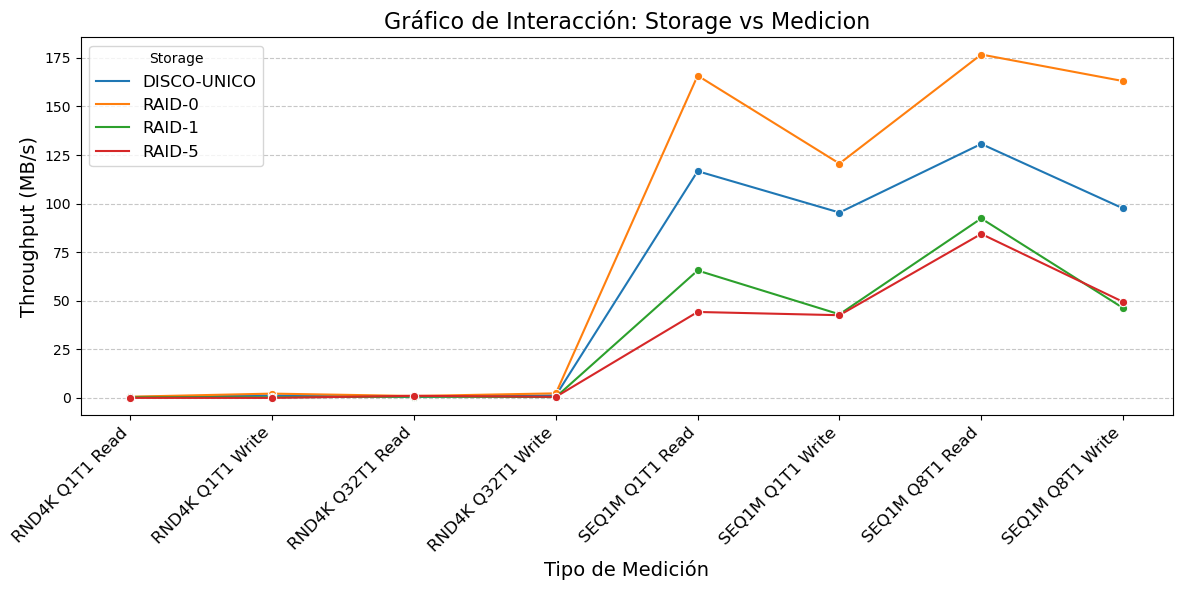

In [66]:
# Crear un gr√°fico de interacci√≥n
plt.figure(figsize=(12, 6))

# Usar el promedio de Throughput para cada combinaci√≥n de Storage y Medicion
mean_values = bank_data.groupby(['Storage', 'Medicion'])['Throughput_MB_s'].mean().reset_index()

# Gr√°fico de l√≠neas
sns.lineplot(data=mean_values, x='Medicion', y='Throughput_MB_s', hue='Storage', marker='o')

# Personalizar el gr√°fico
plt.title('Gr√°fico de Interacci√≥n: Storage vs Medicion', fontsize=16)
plt.xlabel('Tipo de Medici√≥n', fontsize=14)
plt.ylabel('Throughput (MB/s)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Storage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gr√°fico
plt.tight_layout()
plt.show()

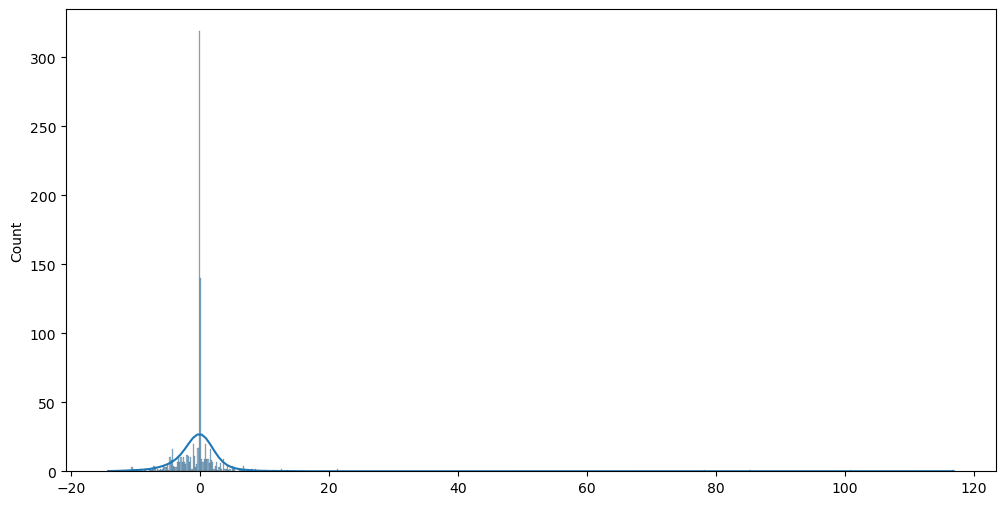

In [58]:
plt.figure(figsize = (12, 6))

sns.histplot(model_two_way_with_interaction.resid, kde = True)

plt.show()

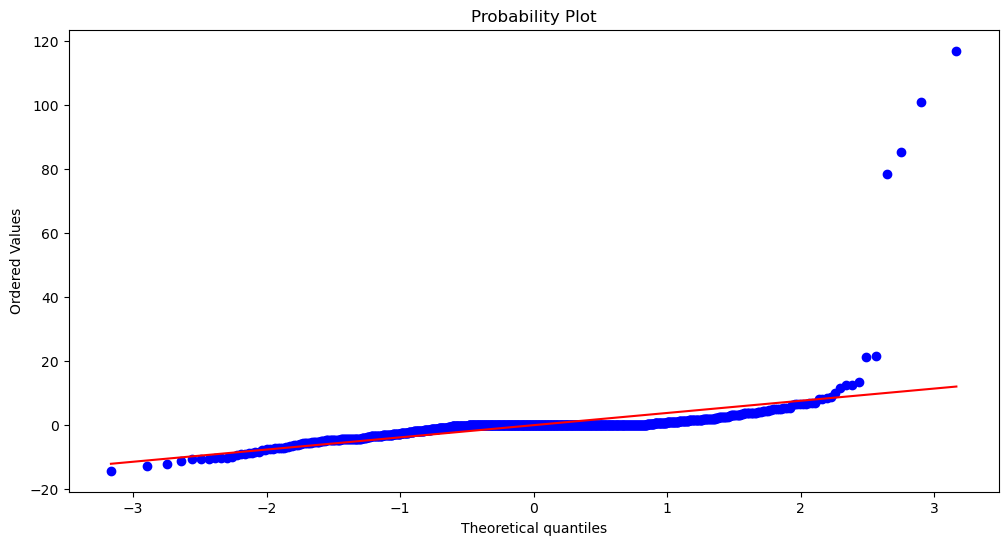

In [59]:
plt.figure(figsize = (12, 6))

probplot(model_two_way_with_interaction.resid, dist = 'norm', plot = plt);

In [60]:
stats.shapiro(model_two_way_with_interaction.resid)

ShapiroResult(statistic=0.2905787229537964, pvalue=0.0)

## Observaciones:

- Desviaciones en los extremos:

Los puntos en los extremos (colas de la distribuci√≥n) se desv√≠an significativamente de la l√≠nea roja.
Esto indica la presencia de valores extremos o colas m√°s pesadas (leptocurtosis), lo que sugiere una desviaci√≥n de la normalidad.
Centro de la distribuci√≥n:

Los puntos centrales est√°n m√°s cerca de la l√≠nea roja, lo que sugiere que la distribuci√≥n es aproximadamente normal en el rango central, pero no completamente.

## Estad√≠stico de Shapiro-Wilk (statistic = 0.2906):

- Este valor mide qu√© tan bien se ajustan los datos a una distribuci√≥n normal.
Valores cercanos a 1 indican una mayor normalidad, mientras que valores m√°s bajos (como este) indican una desviaci√≥n significativa.

- P-valor (pvalue = 0.0):

Un ùëù-valor de 0.0 (menor a 0.05) indica que se rechaza la hip√≥tesis nula de normalidad. Esto confirma estad√≠sticamente que los residuos no siguen una distribuci√≥n normal.